In [1]:
from datasets import load_dataset
data=load_dataset("kde4",lang1='en',lang2='fr')
data

C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for kde4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/kde4
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [33]:
small=data['train'].shuffle(seed=42).select(range(500))

In [34]:
split=small.train_test_split()

In [35]:
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 375
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 125
    })
})

In [36]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [37]:
checkpoint="Helsinki-NLP/opus-mt-en-fr"

In [38]:
en=split["train"][5]["translation"]["en"]
fr=split["train"][5]["translation"]["fr"]

In [39]:
inputs=tokenizer(en)
inputs

{'input_ids': [188, 3413, 4186, 6926, 401, 41738, 2263, 3282, 50, 23155, 2069, 1323, 50, 29964, 23177, 50, 23155, 50, 31987, 28, 2494, 9, 18119, 602, 3419, 3605, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [40]:
with tokenizer.as_target_tokenizer():
    targets=tokenizer(fr)
targets

C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\transformers\tokenization_utils_base.py:3860: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [188, 3413, 4186, 6926, 401, 41352, 2263, 3282, 50, 20795, 2069, 1323, 50, 28063, 23177, 50, 20795, 50, 29156, 28, 9390, 13382, 2891, 402, 29033, 268, 3605, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [41]:
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁B',
 'ET',
 'AD',
 'IST',
 '(',
 '0,2',
 '8',
 '59',
 ';',
 '▁0,2',
 '60',
 '6',
 ';',
 '▁0,8',
 '105',
 ';',
 '▁0,2',
 ';',
 '▁0,9',
 ')',
 '▁vaut',
 '▁0,5',
 '37',
 '▁&',
 '▁#160;',
 '▁8',
 '56',
 '</s>']

(array([251.,  56.,  20.,   9.,   5.,   6.,  10.,   1.,   2.,   1.,   1.,
          2.,   3.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,   27.7,   53.4,   79.1,  104.8,  130.5,  156.2,  181.9,
         207.6,  233.3,  259. ,  284.7,  310.4,  336.1,  361.8,  387.5,
         413.2,  438.9,  464.6,  490.3,  516. ,  541.7,  567.4,  593.1,
         618.8,  644.5,  670.2,  695.9,  721.6,  747.3,  773. ,  798.7,
         824.4,  850.1,  875.8,  901.5,  927.2,  952.9,  978.6, 1004.3,
        1030. , 1055.7, 1081.4, 1107.1, 1132.8, 1158.5, 1184.2, 1209.9,
        1235.6, 1261.3, 1287. ]),
 <BarContainer object of 50 artists>)

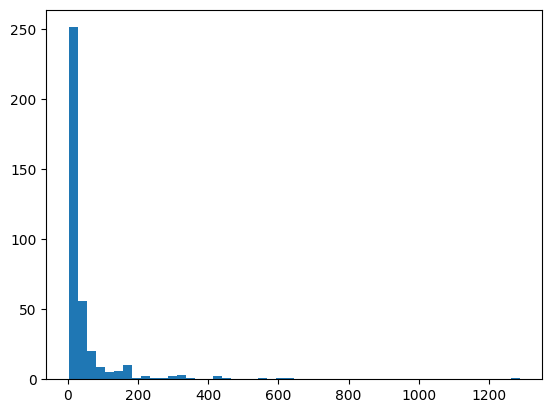

In [42]:
import matplotlib.pyplot as plt
train=split["train"]["translation"]
input_lens=[len(tr['en']) for tr in train]
plt.hist(input_lens,bins=50)

(array([227.,  77.,  24.,   9.,   7.,   7.,   6.,   1.,   2.,   2.,   1.,
          2.,   1.,   1.,   0.,   4.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,   35.7,   69.4,  103.1,  136.8,  170.5,  204.2,  237.9,
         271.6,  305.3,  339. ,  372.7,  406.4,  440.1,  473.8,  507.5,
         541.2,  574.9,  608.6,  642.3,  676. ,  709.7,  743.4,  777.1,
         810.8,  844.5,  878.2,  911.9,  945.6,  979.3, 1013. , 1046.7,
        1080.4, 1114.1, 1147.8, 1181.5, 1215.2, 1248.9, 1282.6, 1316.3,
        1350. , 1383.7, 1417.4, 1451.1, 1484.8, 1518.5, 1552.2, 1585.9,
        1619.6, 1653.3, 1687. ]),
 <BarContainer object of 50 artists>)

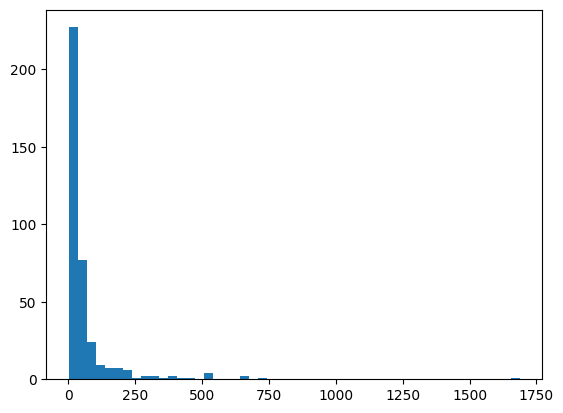

In [43]:
target_lens=[len(tr['fr']) for tr in train]
plt.hist(target_lens,bins=50)

In [44]:
max_input_len=130
max_target_len=130
def tokenizer_fn(batch):
    inputs=[x['en'] for x in batch['translation']]
    targets=[x['fr'] for x in batch['translation']]
    tokenized_inputs=tokenizer(inputs,max_length=max_input_len,truncation=True)
    with tokenizer.as_target_tokenizer():
        tokenized_targets=tokenizer(targets,max_length=max_target_len,truncation=True)
    tokenized_inputs['labels']=tokenized_targets['input_ids']
    return tokenized_inputs

In [45]:
tokenized_data=split.map(
tokenizer_fn,
batched=True,
    remove_columns=split['train'].column_names
)

Map: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 2353.21 examples/s]


In [46]:
tokenized_data['train']

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 375
})

In [47]:
model=AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [48]:
from transformers import DataCollatorForSeq2Seq

In [49]:
pip install sacrebleu bert-score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\singh\desktop\pythonn\llm\cuda\Scripts\python.exe -m pip install --upgrade pip


In [50]:
dc=DataCollatorForSeq2Seq(tokenizer,model)

In [51]:
batch=dc([tokenized_data['train'][i] for i in range(1,3)])

In [52]:
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])


['<pad>',
 '▁S',
 'olo',
 '▁7',
 '▁-',
 '▁qui',
 'nt',
 'es',
 '@',
 'ite',
 'm',
 ':',
 '▁in',
 'list',
 'box']

In [53]:
tokenizer.convert_ids_to_tokens(batch["labels"][0])

['▁S',
 'olo',
 '▁7',
 '▁-',
 '▁qui',
 'nt',
 'es',
 '@',
 'ite',
 'm',
 ':',
 '▁in',
 'list',
 'box',
 '</s>']

In [54]:
from datasets import load_metric
bleu=load_metric("sacrebleu")
bert=load_metric("bertscore")

C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\datasets\load.py:752: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\datasets\load.py:752: FutureWarning: The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=Tr

In [81]:
import numpy as np
def compute(preds_and_labels):
    preds,labels=preds_and_labels
    decoded_preds=tokenizer.batch_decode(preds,skip_special_token=True)
    labels=np.where(labels!=-100,labels,tokenizer.pad_token_id)
    decoded_labels=tokenizer.batch_decode(labels,skip_special_token_id)
    decoded_preds=[pred.strip() for pred in decoded_preds]
    decoded_labels=[[label.strip()] for label in decoded_labels]
    bleu=bleu.compute(predictions=decoded_presds,references=decoded_labels)
    bert=bert.compute(predictions=decoded_presds,references=decoded_labels)
    
    return{"bleu":bleu['score'],'bertscore':bert}

In [56]:
from transformers import Seq2SeqTrainingArguments

In [61]:

training_args=Seq2SeqTrainingArguments(
"finetuned-model",
predict_with_generate=True, #it will generate one token at a time and that token will be fed as input for next time step
  evaluation_strategy='no',
save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=15,
       per_device_eval_batch_size=30,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    fp16=True
)

In [62]:
from transformers import Seq2SeqTrainer

In [69]:
trainer=Seq2SeqTrainer(
model,
training_args,
train_dataset=tokenized_data['train'],
eval_dataset=tokenized_data['test'],
data_collator=dc,
tokenizer=tokenizer,
compute_metrics=compute)

In [79]:
trainer.train()

Step,Training Loss


Checkpoint destination directory finetuned-model\checkpoint-25 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory finetuned-model\checkpoint-50 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory finetuned-model\checkpoint-75 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=75, training_loss=0.904967549641927, metrics={'train_runtime': 185.9058, 'train_samples_per_second': 6.051, 'train_steps_per_second': 0.403, 'total_flos': 19393572372480.0, 'train_loss': 0.904967549641927, 'epoch': 3.0})

In [82]:
trainer.evaluate(max_length=max_target_len)

In [75]:
trainer.save_model("modell")

In [83]:
from transformers import pipeline
translator=pipeline("translation",model="modell",device=0)

C:\Users\singh\desktop\pythonn\llm\cuda\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [86]:
translator("What am i going to cook today?")

[{'translation_text': "Qu'est-ce que je vais cuisiner aujourd'hui ?"}]